In [ ]:
!pip install mycolorpy

  Preparing metadata (setup.py) ... done
  Created wheel for mycolorpy: filename=mycolorpy-1.5.1-py3-none-any.whl size=3850 sha256=a217cadbefa924fe07cf511bb41d8aa15845b5869bd2310a177dafae2e3ef160
  Stored in directory: /root/.cache/pip/wheels/ff/08/3f/5b1529bd9a56c309bc2b6509247e7f7968b3558c6090ce30ee
Successfully built mycolorpy


In [ ]:
!pip install hdbscan

In [ ]:
import math
import hdbscan
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles, make_moons
from mycolorpy import colorlist as mcp

# Points

In [ ]:
def isInside(x0, y0, r, x, y):
    if ((x - x0) * (x - x0) +
        (y - y0) * (y - y0) <= r * r):
        return True;
    else:
        return False;

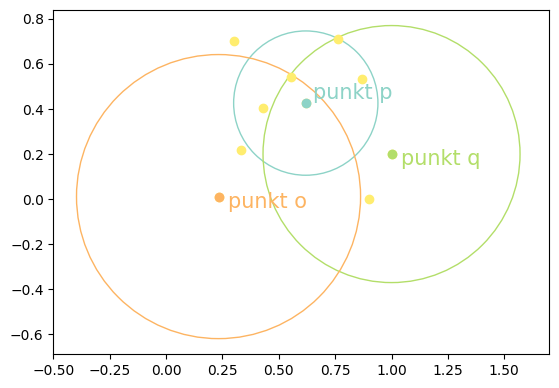

In [ ]:
np.random.seed(8)
X = np.random.uniform(low=0, high=1, size=(10,2))
X[0] = [0.9, 0]
X[4] = [1, 0.2]
X[8] = [0.3,0.7]

minPoint = 5

epsilon = [0 for i in range(len(X))]

for i in range(len(X)):
  while sum([isInside(X[i][0], X[i][1], epsilon[i], X[j][0],
                   X[j][1]) for j in range(len(X))]) < minPoint:
                   epsilon[i] = epsilon[i] + 0.01


fig, ax = plt.subplots()

color = mcp.gen_color(cmap="Set3",n=12)[11]
color1 = mcp.gen_color(cmap="Set3",n=12)[0]
color2 = mcp.gen_color(cmap="Set3",n=12)[6]
color3 = mcp.gen_color(cmap="Set3",n=12)[5]

p=7
ax.add_patch(plt.Circle([X[p][0], X[p][1]], epsilon[p], color=color1,
                          alpha=1, fill = False))
plt.scatter(X[p, 0], X[p, 1], color=color1, zorder=4)

q=4
ax.add_patch(plt.Circle([X[q][0], X[q][1]], epsilon[q], color=color2,
                          alpha=1, fill = False))
plt.scatter(X[q, 0], X[q, 1], color=color2, zorder=4)

o=2
ax.add_patch(plt.Circle([X[o][0], X[o][1]], epsilon[o], color=color3,
                          alpha=1, fill = False))
plt.scatter(X[o, 0], X[o, 1], color=color3, zorder=4)

#ax.plot([X[o][0],X[q][0]], [X[o][1],X[q][1]], '-',
#        c=color3)
#ax.plot([X[p][0],X[q][0]], [X[p][1],X[q][1]], '-',
#        c=color1)

plt.text(X[p][0]+0.03, X[p][1]+0.02, 'punkt p',
         c=color1, fontsize=15)
plt.text(X[q][0]+0.04, X[q][1]-0.05, 'punkt q',
         c=color2, fontsize=15)
plt.text(X[o][0]+0.04, X[o][1]-0.05, 'punkt o',
         c=color3, fontsize=15)

plt.scatter(X[:, 0], X[:, 1], color=color)

ax.set_xlim(left = -0.5, right = 1.7)
ax.set_aspect('equal')
ax.plot()
plt.show()

In [ ]:
moons, _ = make_moons(n_samples=500, noise=0.09)
blobs, _ = make_blobs(n_samples=500, centers=[(-0.75,2.25), (1.0, 2.0)], cluster_std=0.3)
X = np.vstack([moons, blobs])

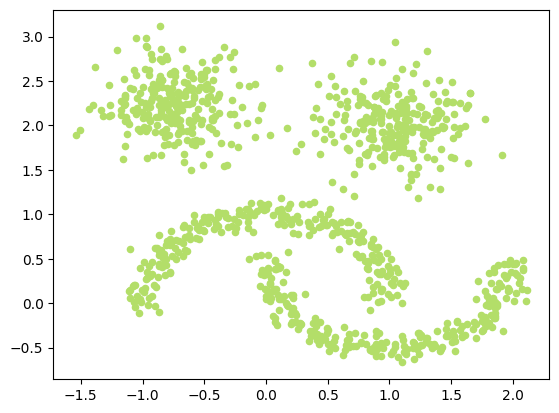

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s=20, color = mcp.gen_color(cmap="Set3",n=12)[6])

In [ ]:
cluster_hdb = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
cluster_hdb.fit(X)

HDBSCAN(gen_min_span_tree=True)

<Axes: ylabel='distance'>

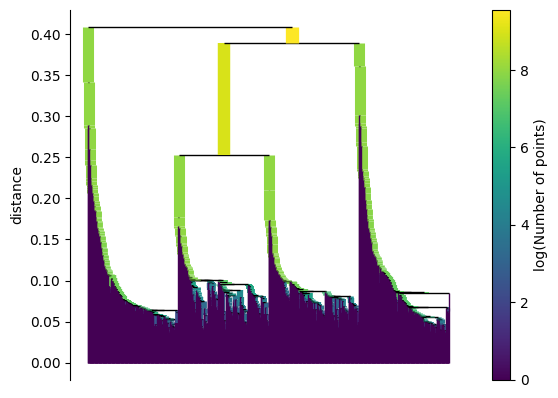

In [ ]:
cluster_hdb.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

<Axes: ylabel='$\\lambda$ value'>

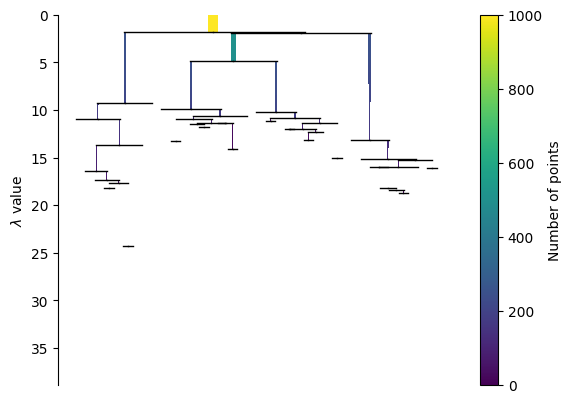

In [ ]:
cluster_hdb.condensed_tree_.plot()

<Axes: ylabel='$\\lambda$ value'>

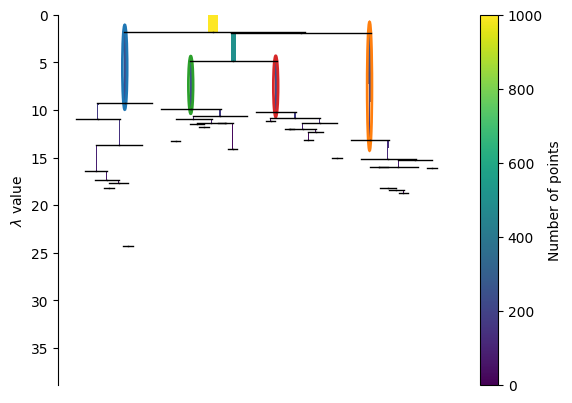

In [ ]:
cluster_hdb.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

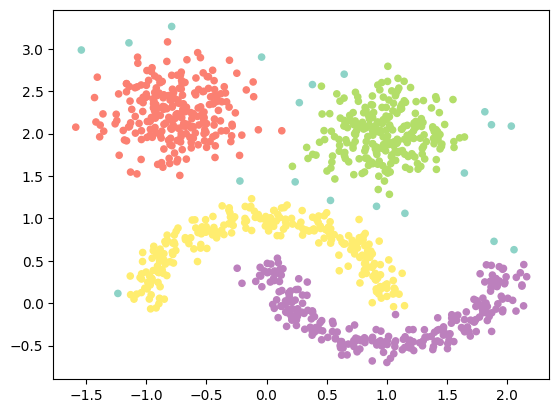

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s=20, c=cluster_hdb.labels_, cmap='Set3')